<a href="https://colab.research.google.com/github/HS587885/Studying-MachineLearning/blob/main/%EB%AF%B8%EC%88%A0%EC%9E%91%ED%92%88%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/data/art_data/train.zip
!unzip /content/drive/MyDrive/data/art_data/test.zip

Archive:  /content/drive/MyDrive/data/art_data/train.zip
   creating: train/
   creating: train/dog/
  inflating: train/dog/pic_001.jpg   
  inflating: train/dog/pic_002.jpg   
  inflating: train/dog/pic_003.jpg   
  inflating: train/dog/pic_004.jpg   
  inflating: train/dog/pic_005.jpg   
  inflating: train/dog/pic_006.jpg   
  inflating: train/dog/pic_007.jpg   
  inflating: train/dog/pic_008.jpg   
  inflating: train/dog/pic_009.jpg   
  inflating: train/dog/pic_010.jpg   
  inflating: train/dog/pic_011.jpg   
  inflating: train/dog/pic_012.jpg   
  inflating: train/dog/pic_013.jpg   
  inflating: train/dog/pic_014.jpg   
  inflating: train/dog/pic_015.jpg   
  inflating: train/dog/pic_016.jpg   
  inflating: train/dog/pic_017.jpg   
  inflating: train/dog/pic_018.jpg   
  inflating: train/dog/pic_019.jpg   
  inflating: train/dog/pic_020.jpg   
  inflating: train/dog/pic_021.jpg   
  inflating: train/dog/pic_022.jpg   
  inflating: train/dog/pic_023.jpg   
  inflating: train/dog/pi

In [ ]:
# !unzip /content/drive/MyDrive/data/ball_data/train.zip -d /content/train/
# !unzip /content/drive/MyDrive/data/ball_data/test.zip  -d /content/test/

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob
from PIL import Image
import cv2
import albumentations as A
from tqdm import tqdm


In [2]:
import cv2

# 이미지 불러오기
image_path = "/content/train/dog/pic_001.jpg"  # 이미지 파일 경로
image = cv2.imread(image_path)

# 이미지의 크기 확인
image_size = (image.shape[1], image.shape[0])  # OpenCV에서는 (세로, 가로) 순서로 크기가 반환됩니다.
print("이미지 크기:", image_size)

# 이미지 배열의 형태 확인
print("이미지 배열의 형태:", image.shape)


이미지 크기: (227, 227)
이미지 배열의 형태: (227, 227, 3)


In [3]:
from glob import glob

dog = glob('/content/train/dog/*jpg')
elephant = glob('/content/train/elephant/*.jpg')
giraffe = glob('/content/train/giraffe/*.jpg')
guitar = glob('/content/train/guitar/*.jpg')
horse = glob('/content/train/horse/*.jpg')
house = glob('/content/train/house/*.jpg')
person = glob('/content/train/person/*.jpg')

train_path = dog + elephant + giraffe + guitar + horse + house + person
labels = [0] * len(dog) + [1] * len(elephant) + [2] * len(giraffe) + [3] * len(guitar) + [4] * len(horse) + [5] * len(house) + [6] * len(person)
labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
from glob import glob

# 각 종류별로 이미지 경로 수집
american_football = glob('/content/train/american_football/*jpg')
baseball = glob('/content/train/baseball/*jpg')
basketball = glob('/content/train/basketball/*jpg')
billiard_ball = glob('/content/train/billiard_ball/*jpg')
bowling_ball = glob('/content/train/bowling_ball/*jpg')
cricket_ball = glob('/content/train/cricket_ball/*jpg')
football = glob('/content/train/football/*jpg')
golf_ball = glob('/content/train/golf_ball/*jpg')
hockey_ball = glob('/content/train/hockey_ball/*jpg')
hockey_puck = glob('/content/train/hockey_puck/*jpg')
rugby_ball = glob('/content/train/rugby_ball/*jpg')
shuttlecock = glob('/content/train/shuttlecock/*jpg')
table_tennis_ball = glob('/content/train/table_tennis_ball/*jpg')
tennis_ball = glob('/content/train/tennis_ball/*jpg')
volleyball = glob('/content/train/volleyball/*jpg')

# 모든 경로를 하나의 리스트에 결합
train_path = american_football + baseball + basketball + billiard_ball + bowling_ball + \
             cricket_ball + football + golf_ball + hockey_ball + hockey_puck + \
             rugby_ball + shuttlecock + table_tennis_ball + tennis_ball + volleyball

# 각 이미지 카테고리에 대한 레이블 생성
labels = [0] * len(american_football) + [1] * len(baseball) + [2] * len(basketball) + \
         [3] * len(billiard_ball) + [4] * len(bowling_ball) + [5] * len(cricket_ball) + \
         [6] * len(football) + [7] * len(golf_ball) + [8] * len(hockey_ball) + \
         [9] * len(hockey_puck) + [10] * len(rugby_ball) + [11] * len(shuttlecock) + \
         [12] * len(table_tennis_ball) + [13] * len(tennis_ball) + [14] * len(volleyball)


In [28]:
from sklearn.model_selection import train_test_split
from PIL import Image

train_img = [np.array(Image.open(path).resize((224,224),).convert('RGB')) for path in train_path]


In [29]:
train_img = np.array(train_img)

train_img.shape

(1698, 224, 224, 3)

<ipython-input-8-65a669e1f34f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=label_list, palette=class_colors.values())


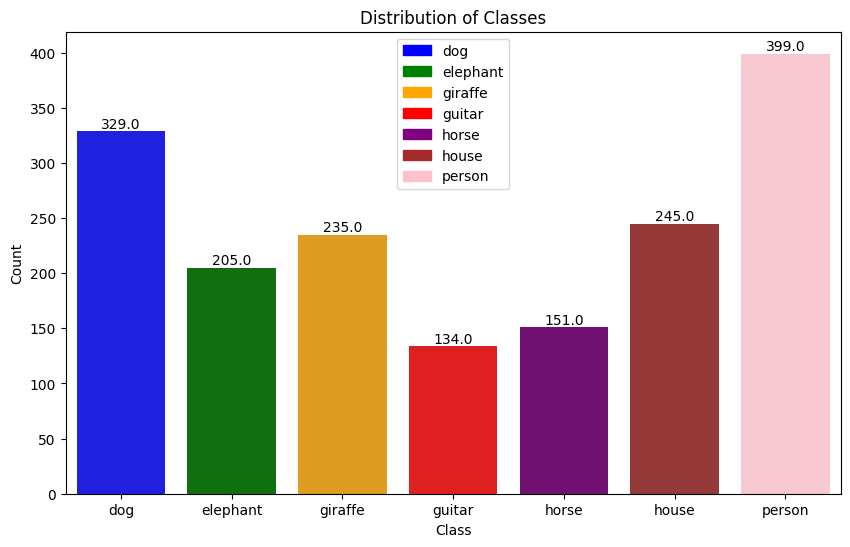

In [8]:
label_list = ['dog'] * len(dog) + ['elephant'] * len(elephant) + ['giraffe'] * len(giraffe) + ['guitar'] * len(guitar) + ['horse'] * len(horse) + ['house'] * len(house) + ['person'] * len(person)



class_colors = {
    'dog': 'blue',
    'elephant': 'green',
    'giraffe': 'orange',
    'guitar': 'red',
    'horse': 'purple',
    'house': 'brown',
    'person': 'pink'
}

plt.figure(figsize=(10, 6))
ax = sns.countplot(x=label_list, palette=class_colors.values())
ax.set_title('Distribution of Classes')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

handles = [plt.Rectangle((0,0),1,1, color=color) for color in class_colors.values()]
ax.legend(handles, class_colors.keys())

plt.show()

<ipython-input-10-b05a3109c402>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=label_list, palette=class_colors.values())


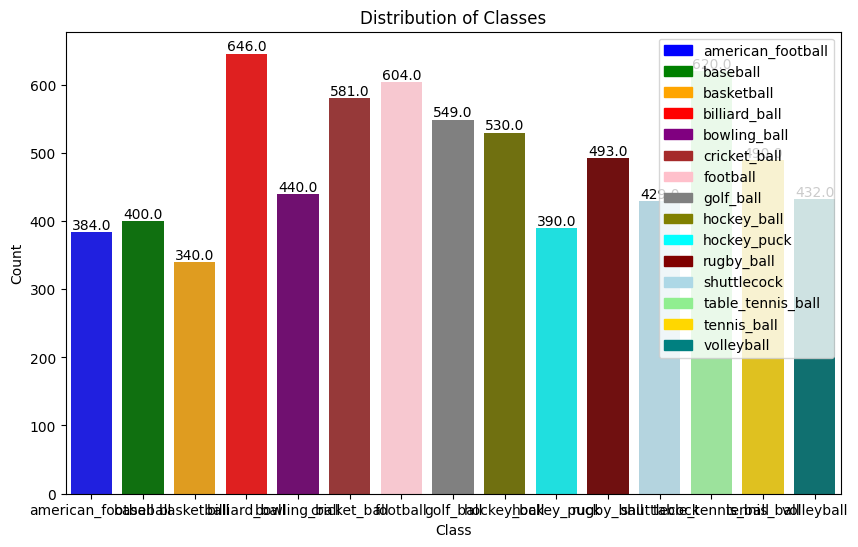

american_football: 384
baseball: 400
basketball: 340
billiard_ball: 646
bowling_ball: 440
cricket_ball: 581
football: 604
golf_ball: 549
hockey_ball: 530
hockey_puck: 390
rugby_ball: 493
shuttlecock: 429
table_tennis_ball: 620
tennis_ball: 490
volleyball: 432


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 새로운 클래스 목록에 따른 레이블 리스트 생성
label_list = ['american_football'] * len(american_football) + ['baseball'] * len(baseball) + \
             ['basketball'] * len(basketball) + ['billiard_ball'] * len(billiard_ball) + \
             ['bowling_ball'] * len(bowling_ball) + ['cricket_ball'] * len(cricket_ball) + \
             ['football'] * len(football) + ['golf_ball'] * len(golf_ball) + \
             ['hockey_ball'] * len(hockey_ball) + ['hockey_puck'] * len(hockey_puck) + \
             ['rugby_ball'] * len(rugby_ball) + ['shuttlecock'] * len(shuttlecock) + \
             ['table_tennis_ball'] * len(table_tennis_ball) + ['tennis_ball'] * len(tennis_ball) + \
             ['volleyball'] * len(volleyball)

# 각 클래스에 대한 색상 지정
class_colors = {
    'american_football': 'blue',
    'baseball': 'green',
    'basketball': 'orange',
    'billiard_ball': 'red',
    'bowling_ball': 'purple',
    'cricket_ball': 'brown',
    'football': 'pink',
    'golf_ball': 'gray',
    'hockey_ball': 'olive',
    'hockey_puck': 'cyan',
    'rugby_ball': 'maroon',
    'shuttlecock': 'lightblue',
    'table_tennis_ball': 'lightgreen',
    'tennis_ball': 'gold',
    'volleyball': 'teal'
}

# 클래스 분포 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=label_list, palette=class_colors.values())
ax.set_title('Distribution of Classes')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# 각 막대에 데이터 수 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# 범례 생성
handles = [patches.Rectangle((0,0),1,1, color=color) for color in class_colors.values()]
ax.legend(handles, class_colors.keys())

plt.show()


# 각 클래스의 이미지 개수 계산
class_counts = {
    'american_football': len(american_football),
    'baseball': len(baseball),
    'basketball': len(basketball),
    'billiard_ball': len(billiard_ball),
    'bowling_ball': len(bowling_ball),
    'cricket_ball': len(cricket_ball),
    'football': len(football),
    'golf_ball': len(golf_ball),
    'hockey_ball': len(hockey_ball),
    'hockey_puck': len(hockey_puck),
    'rugby_ball': len(rugby_ball),
    'shuttlecock': len(shuttlecock),
    'table_tennis_ball': len(table_tennis_ball),
    'tennis_ball': len(tennis_ball),
    'volleyball': len(volleyball)
}

# 클래스별 이미지 개수 출력
for class_name, count in class_counts.items():
    print(f'{class_name}: {count}')



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_img, labels, test_size =0.2, stratify=labels, random_state=42 )

In [7]:
X_train.shape

(1358, 224, 224, 3)

In [8]:
np.unique(y_valid)

array([0, 1, 2, 3, 4, 5, 6])

In [9]:
# 각 채널에 대한 평균 계산
mean = np.mean(X_train, axis=(0, 1, 2))

# 각 채널에 대한 표준 편차 계산
std = np.std(X_train, axis=(0, 1, 2))

print("Mean of the training set:", mean)
print("Standard deviation of the training set:", std)

Mean of the training set: [142.19649521 129.74562832 116.89666354]
Standard deviation of the training set: [71.96199095 69.9077816  73.43299025]


- Mean of the training set: [176.45738985 169.99194224 159.54428025]
- Standard deviation of the training set: [85.56845969 85.89364662 92.5908537 ]


In [ ]:
mean = [176.45738985, 169.99194224, 159.54428025]
std = [85.56845969, 85.89364662, 92.5908537]

In [14]:
# Training params.
batch_size = 64
img_height, img_width = 224, 224

epochs = 15
# Network architecture params.
num_classes = 7

In [15]:
# # 데이터 전처리 및 증강
# train_augmentation = A.Compose([
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
#     A.RandomGamma(gamma_limit=(80, 120), p=0.5),
#     A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, border_mode=cv2.BORDER_REFLECT_101, p=0.8),
#     A.Normalize(mean=mean, std=std)

# ])

# test_augmentation = A.Compose([A.Normalize(mean=mean, std=std)])  #


# # 데이터 증강 적용
# X_train_aug = np.array([train_augmentation(image=img.astype(np.float32))['image']  for img in X_train])
# X_valid_aug = np.array([test_augmentation(image=img.astype(np.float32))['image'] for img in X_valid])


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 설정과 함께 이미지 정규화 적용
data_gen = ImageDataGenerator(
    #rescale=1./255,  # 픽셀 값을 [0, 1] 범위로 정규화
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 데이터 증강이 적용된 이미지를 배치로 생성
train_generator = data_gen.flow(X_train, y_train, batch_size=batch_size)
# 검증 데이터에 대한 ImageDataGenerator 생성 (데이터 증강 없이 정규화만 적용)
valid_datagen = ImageDataGenerator()#rescale=1./255

# 검증 데이터셋을 배치로 생성
valid_generator = valid_datagen.flow(X_valid, y_valid, batch_size=batch_size)


In [17]:
X_train.shape

(1358, 224, 224, 3)

In [18]:
#np.unique(X_train_aug[0])

In [19]:
# y_train = np.array(y_train)
#y_valid = np.array(y_valid)

In [20]:
# EfficientNetB2 모델 정의
base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
#ase_model.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
#base_model.summary()

In [22]:
y_valid[:5]

[5, 6, 2, 1, 6]

In [23]:
# 콜백 정의
model_dir = '/content/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/test.h5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=6)

# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,  # 한 에폭에 사용할 스텝 수
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=len(X_valid) // batch_size,  # 검증 데이터에 대한 스텝 수
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/15
21/21 [==============================] - ETA: 0s - loss: 0.8706 - accuracy: 0.7180
Epoch 1: val_loss improved from inf to 2.05901, saving model to /content/model/test.h5
21/21 [==============================] - 82s 1s/step - loss: 0.8706 - accuracy: 0.7180 - val_loss: 2.0590 - val_accuracy: 0.1344
Epoch 2/15
21/21 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8764
Epoch 2: val_loss improved from 2.05901 to 1.94955, saving model to /content/model/test.h5
21/21 [==============================] - 25s 1s/step - loss: 0.3686 - accuracy: 0.8764 - val_loss: 1.9495 - val_accuracy: 0.2313
Epoch 3/15
21/21 [==============================] - ETA: 0s - loss: 0.2263 - accuracy: 0.9189
Epoch 3: val_loss did not improve from 1.94955
21/21 [==============================] - 26s 1s/step - loss: 0.2263 - accuracy: 0.9189 - val_loss: 2.0115 - val_accuracy: 0.1875
Epoch 4/15
21/21 [==============================] - ETA: 0s - loss: 0.1908 - accuracy: 0.9366
Epoch 4: val

In [13]:
# 콜백 정의
model_dir = '/content/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/test.h5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=6)

# 모델 훈련
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint, early_stopping]
)




Epoch 1/15
43/43 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.8093
Epoch 1: val_loss improved from inf to 1.03335, saving model to /content/model/test.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 72s 539ms/step - loss: 0.5922 - accuracy: 0.8093 - val_loss: 1.0333 - val_accuracy: 0.7912
Epoch 2/15
43/43 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9367
Epoch 2: val_loss improved from 1.03335 to 0.97342, saving model to /content/model/test.h5
43/43 [==============================] - 18s 416ms/step - loss: 0.2046 - accuracy: 0.9367 - val_loss: 0.9734 - val_accuracy: 0.8294
Epoch 3/15
43/43 [==============================] - ETA: 0s - loss: 0.1855 - accuracy: 0.9359
Epoch 3: val_loss improved from 0.97342 to 0.73954, saving model to /content/model/test.h5
43/43 [==============================] - 18s 413ms/step - loss: 0.1855 - accuracy: 0.9359 - val_loss: 0.7395 - val_accuracy: 0.8529
Epoch 4/15
43/43 [==============================] - ETA: 0s - loss: 0.1336 - accuracy: 0.9617
Epoch 4: val_loss improved from 0.73954 to 0.61742, saving model to /content/model/test.h5
43/43 [==============================] - 18s 409m

In [19]:
model.predict(X_valid_aug[:5]).argmax(-1)

1/1 [==============================] - 3s 3s/step


array([0, 0, 0, 0, 0])

In [24]:
y_pred = model.predict(X_valid).argmax(-1)
y_pred[:5]

11/11 [==============================] - 6s 357ms/step


array([2, 2, 2, 2, 2])

In [25]:
y_valid[:5]

[5, 6, 2, 1, 6]

In [26]:
from sklearn.metrics import f1_score, accuracy_score

# 실제 레이블과 예측 레이블


# F1 Score 계산
f1 = f1_score(y_valid, y_pred, average='weighted')  # 'weighted'는 클래스 불균형을 고려합니다

# Accuracy 계산
accuracy = accuracy_score(y_valid, y_pred)

# 결과 출력
print("F1 Score:", f1)
print("Accuracy:", accuracy)


F1 Score: 0.0335765313877489
Accuracy: 0.13823529411764707


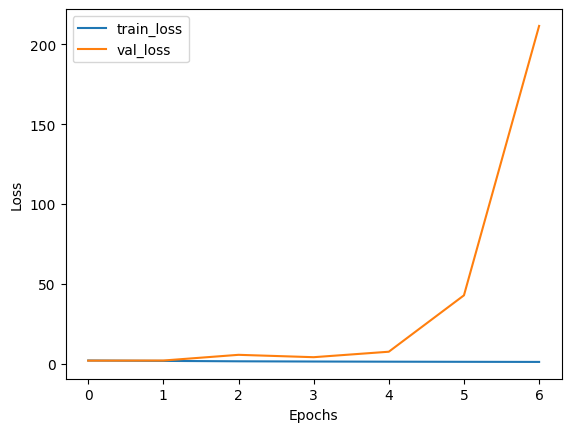

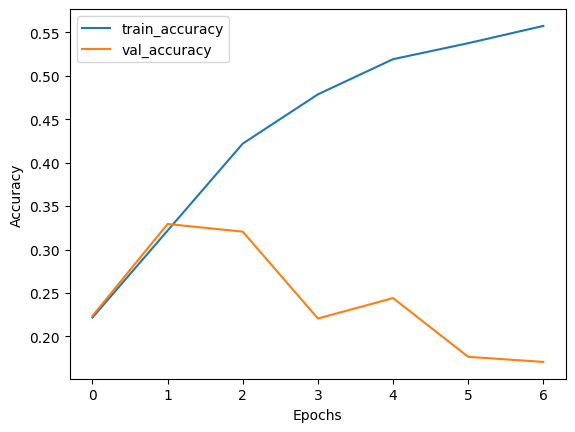

In [ ]:
# 훈련 결과 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_valid_aug, y_valid)

11/11 [==============================] - 1s 85ms/step - loss: 0.5368 - accuracy: 0.8676


[0.5368494987487793, 0.8676470518112183]

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/data/art_data/test_answer_sample_.csv')
df = test.reindex(index=test.index[:350], columns=list(test.columns))
print(df)

     Unnamed: 0  answer value
0             0             0
1             1             0
2             2             0
3             3             0
4             4             0
..          ...           ...
345         345             0
346         346             0
347         347             0
348         348             0
349         349             0

[350 rows x 2 columns]


In [ ]:
df['answer value']

0      0
1      0
2      0
3      0
4      0
      ..
345    0
346    0
347    0
348    0
349    0
Name: answer value, Length: 350, dtype: int64

In [ ]:
df.to_csv("result.csv")

In [ ]:
df.to_csv("result.csv",mode='w',index=False)


In [ ]:
!pwd

/content


In [ ]:
!cp -r /content/model /content/drive/MyDrive/data/art_data

In [ ]:
!mv --help

Usage: mv [OPTION]... [-T] SOURCE DEST
  or:  mv [OPTION]... SOURCE... DIRECTORY
  or:  mv [OPTION]... -t DIRECTORY SOURCE...
Rename SOURCE to DEST, or move SOURCE(s) to DIRECTORY.

Mandatory arguments to long options are mandatory for short options too.
      --backup[=CONTROL]       make a backup of each existing destination file
  -b                           like --backup but does not accept an argument
  -f, --force                  do not prompt before overwriting
  -i, --interactive            prompt before overwrite
  -n, --no-clobber             do not overwrite an existing file
If you specify more than one of -i, -f, -n, only the final one takes effect.
      --strip-trailing-slashes  remove any trailing slashes from each SOURCE
                                 argument
  -S, --suffix=SUFFIX          override the usual backup suffix
  -t, --target-directory=DIRECTORY  move all SOURCE arguments into DIRECTORY
  -T, --no-target-directory    treat DEST as a normal file
  -u, --u

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# The path to the generated image (replace this with the actual file path)
img_path = '/mnt/data/Create_a_detailed_and_colorful_scene_depicting_a_s.png'

# Annotations for the dog and cat
annotation = {
    'boxes': [[100, 50, 200, 150], [250, 75, 350, 125]],  # xmin, ymin, xmax, ymax
    'labels': [0, 1]  # 0 for dog, 1 for cat
}

plot_image(img_path, annotation)


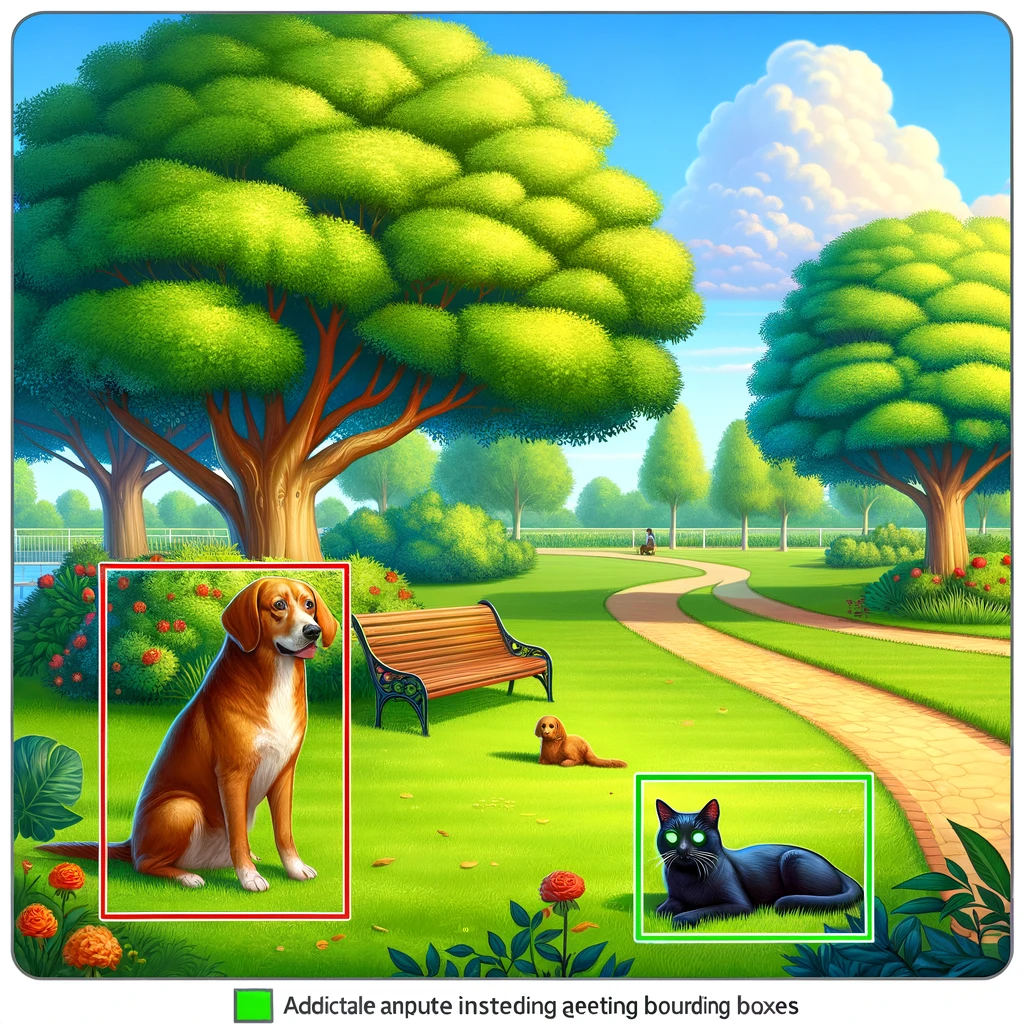

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.applications import MobileNet, ResNet50



In [ ]:
mobile = MobileNet(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))


model = Sequential([
    mobile,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# 콜백 정의
model_dir = '/content/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/MobileNet.h5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=6)

# 모델 훈련
history = model.fit(
    X_train_aug,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid_aug, y_valid),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
43/43 [==============================] - ETA: 0s - loss: 2.1644 - accuracy: 0.3122
Epoch 1: val_loss improved from inf to 6.99725, saving model to /content/model/MobileNet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 27s 202ms/step - loss: 2.1644 - accuracy: 0.3122 - val_loss: 6.9972 - val_accuracy: 0.2353
Epoch 2/10
43/43 [==============================] - ETA: 0s - loss: 1.4447 - accuracy: 0.4794
Epoch 2: val_loss improved from 6.99725 to 3.15921, saving model to /content/model/MobileNet.h5
43/43 [==============================] - 5s 127ms/step - loss: 1.4447 - accuracy: 0.4794 - val_loss: 3.1592 - val_accuracy: 0.1941
Epoch 3/10
43/43 [==============================] - ETA: 0s - loss: 1.2325 - accuracy: 0.5265
Epoch 3: val_loss did not improve from 3.15921
43/43 [==============================] - 5s 115ms/step - loss: 1.2325 - accuracy: 0.5265 - val_loss: 3.5678 - val_accuracy: 0.2176
Epoch 4/10
43/43 [==============================] - ETA: 0s - loss: 1.1421 - accuracy: 0.5604
Epoch 4: val_loss did not improve from 3.15921
43/43 [==============================] - 5s 121ms/step - loss: 1.1421 - accuracy: 0.5604 - val_loss: 4.2211 - val_accuracy: 0.1441
Epo

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# 실제 레이블과 예측 레이블
y_pred = model.predict(X_valid_aug).argmax(-1)

# F1 Score 계산
f1 = f1_score(y_valid, y_pred, average='weighted')  # 'weighted'는 클래스 불균형을 고려합니다

# Accuracy 계산
accuracy = accuracy_score(y_valid, y_pred)

# 결과 출력
print("F1 Score:", f1)
print("Accuracy:", accuracy)

11/11 [==============================] - 2s 46ms/step
F1 Score: 0.1482063580740558
Accuracy: 0.20294117647058824


- average='macro':
'macro' 평균은 각 클래스에 대한 메트릭을 독립적으로 계산하고, 이러한 메트릭들의 단순 평균을 취합니다.
클래스 간에 균등한 가중치를 부여합니다. 즉, 모든 클래스가 동일하게 중요하다고 가정합니다.
클래스 사이즈에 관계없이 모든 클래스를 동등하게 취급합니다.
클래스 불균형이 심각한 경우, 'macro' 평균은 소수 클래스에 과도하게 영향을 받을 수 있습니다.
----
- average='weighted':
'weighted' 평균은 각 클래스의 샘플 수에 따라 가중치를 부여하여 메트릭을 계산합니다.
클래스의 크기(샘플 수)에 따라 가중치가 결정됩니다. 즉, 더 많은 샘플을 가진 클래스가 메트릭에 더 큰 영향을 미칩니다.
클래스 불균형이 있는 경우에 유용하며, 대표성이 더 높은 클래스의 성능이 전체 메트릭에 더 큰 영향을 미칩니다.
이는 대규모 클래스의 성능이 메트릭에 더 많이 반영되므로, 소수 클래스의 성능이 전체 결과에 큰 영향을 미치지 않도록 합니다.

In [ ]:
from sklearn.metrics import f1_score

# 각 모델의 예측값을 얻습니다.
y_pred1 = model1.predict(X_valid)
y_pred2 = model2.predict(X_valid)
y_pred3 = model3.predict(X_valid)

# 클래스를 결정하기 위해 가장 높은 확률의 인덱스를 가져옵니다.
y_pred_class1 = np.argmax(y_pred1, axis=1)
y_pred_class2 = np.argmax(y_pred2, axis=1)
y_pred_class3 = np.argmax(y_pred3, axis=1)

# 실제 레이블과 비교하여 각 모델의 F1 점수를 계산합니다.
f1_score1 = f1_score(y_valid, y_pred_class1, average='weighted')
f1_score2 = f1_score(y_valid, y_pred_class2, average='weighted')
f1_score3 = f1_score(y_valid, y_pred_class3, average='weighted')

print(f"Model 1 F1 score: {f1_score1}")
print(f"Model 2 F1 score: {f1_score2}")
print(f"Model 3 F1 score: {f1_score3}")




In [ ]:
# 각 모델로부터 예측값을 얻습니다.
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

# 예측값들의 평균을 구합니다.
final_predictions = (predictions1 + predictions2 + predictions3) / 3.0

# 최종 예측값을 사용하여 필요한 작업을 수행합니다.
# 예를 들어, 최종 예측값을 기반으로 정확도를 계산하거나,
# 분류 문제의 경우 최대 확률을 갖는 클래스를 선택할 수 있습니다.
final_classes = np.argmax(final_predictions, axis=1)  # 분류 문제인 경우


In [ ]:
import pandas as pd

# 각 모델로부터의 예측 클래스 레이블 예시
y_pred_class1 = [2, 0, 1]  # 모델 1의 예측
y_pred_class2 = [1, 0, 1]  # 모델 2의 예측
y_pred_class3 = [2, 0, 2]  # 모델 3의 예측

# 위의 예측을 DataFrame으로 결합
temp = pd.DataFrame({
    'Model1': y_pred_class1,
    'Model2': y_pred_class2,
    'Model3': y_pred_class3
})

submit_csv['ans'] = temp.mode(axis=1)[0].astype('int')

